Imports & Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Plotting setup
sns.set(style="whitegrid")
%matplotlib inline


Load Dataset

In [4]:
# Load the main dataset
file_path = "../data/raw/data.csv"
df = pd.read_csv(file_path)

# Preview the data
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


Basic Overview

In [5]:
# Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Data types and non-null info
df.info()

# Preview column names
df.columns.tolist()


Rows: 95662, Columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

 Missing Values

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


Series([], dtype: int64)

Summary Statistics

In [7]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Date & Type Conversions

In [8]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')

# Check conversion success
df[['TransactionStartTime']].head()


,TransactionStartTime
0,2018-11-15 02:18:49+00:00
1,2018-11-15 02:19:08+00:00
2,2018-11-15 02:44:21+00:00
3,2018-11-15 03:32:55+00:00
4,2018-11-15 03:34:21+00:00


Numeric Feature Distributions

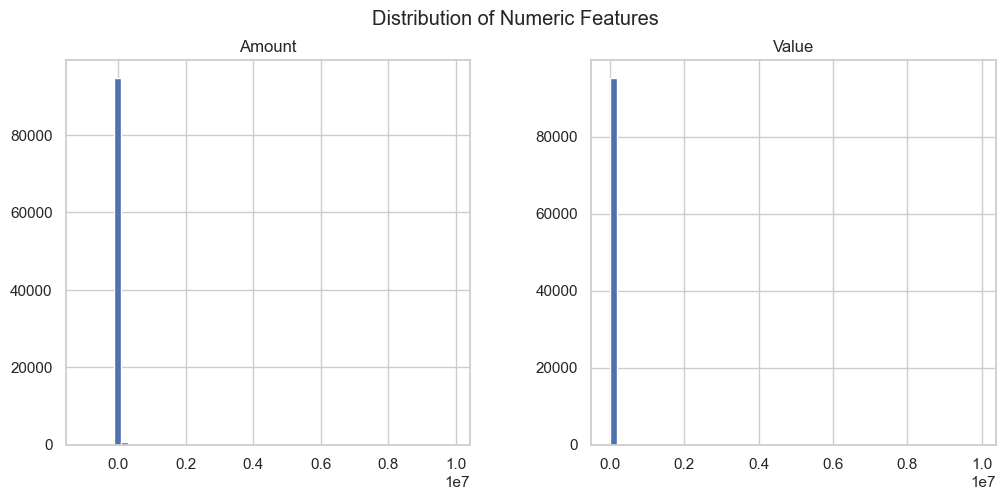

In [9]:
numeric_cols = ['Amount', 'Value']
df[numeric_cols].hist(bins=50, figsize=(12, 5))
plt.suptitle("Distribution of Numeric Features")
plt.show()


Categorical Feature Distributions


CurrencyCode - Top 5 Values:
 CurrencyCode
UGX    95662
Name: count, dtype: int64


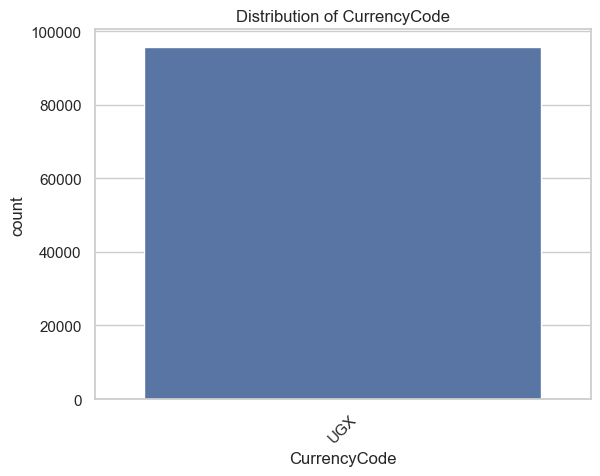


CountryCode - Top 5 Values:
 CountryCode
256    95662
Name: count, dtype: int64


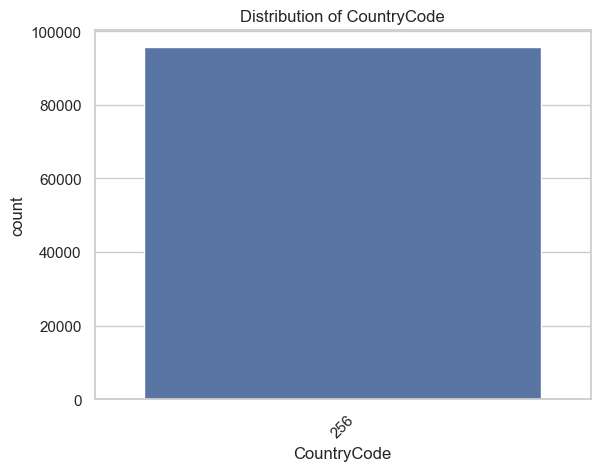


ProductCategory - Top 5 Values:
 ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64


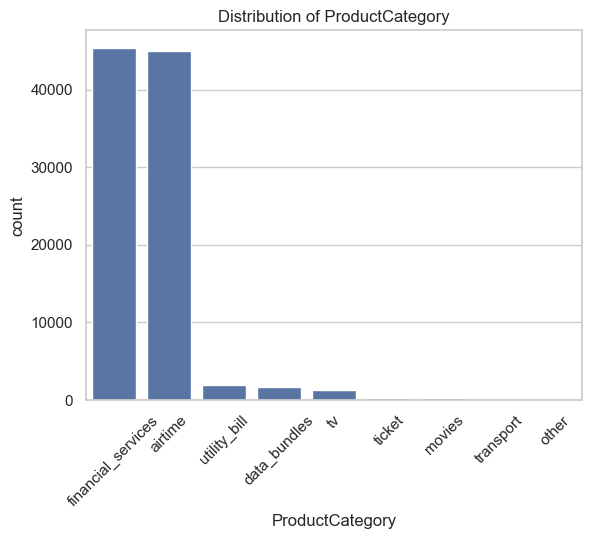


ChannelId - Top 5 Values:
 ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


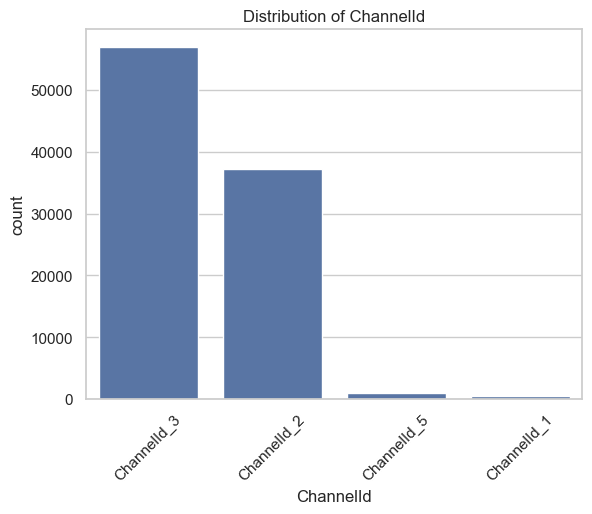


PricingStrategy - Top 5 Values:
 PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64


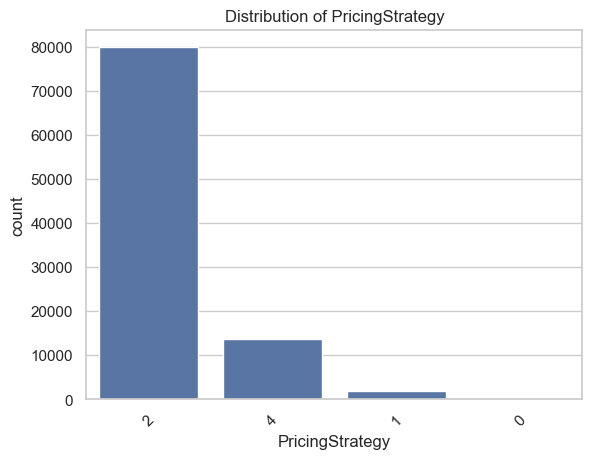


FraudResult - Top 5 Values:
 FraudResult
0    95469
1      193
Name: count, dtype: int64


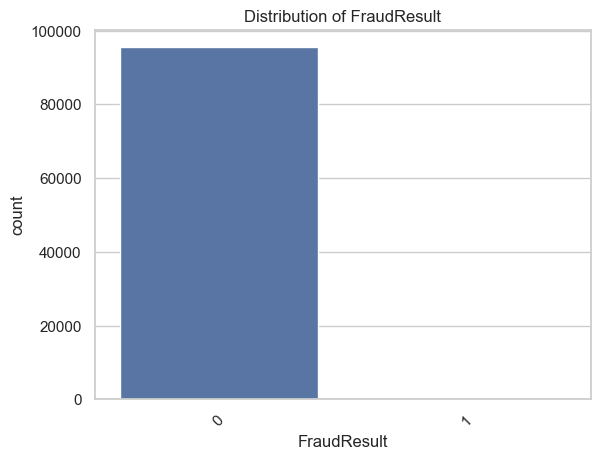

In [10]:
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in categorical_cols:
    print(f"\n{col} - Top 5 Values:\n", df[col].value_counts().head(5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


Correlation Matrix

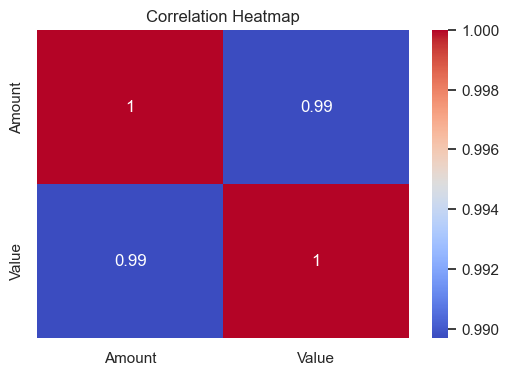

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Outlier Detection (Box Plots)

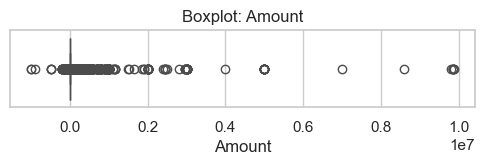

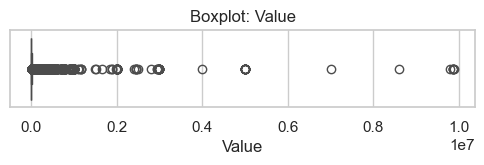

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


✅ EDA Final Markdown

## 🔍 Key Insights from Exploratory Data Analysis (EDA)

1. **Transaction Behavior Varies Widely in Amounts:**
   - The `Amount` and `Value` fields exhibit heavy right-skew with many small-value transactions and a few very large ones.
   - Presence of **negative Amounts** suggests either refunds or credit transactions — this needs to be handled during feature engineering.

2. **Customer Activity Is Repetitive and Clustered:**
   - Some customers appear in multiple rows (as expected) — this means we can compute **RFM (Recency, Frequency, Monetary)** features for clustering and proxy labeling.

3. **Missing and Inconsistent Data Detected:**
   - Fields like `CountryCode`, `ProviderId`, and `Amount` have missing values in some rows.
   - These will need imputation, or we’ll drop irrelevant rows/columns in the processing pipeline.

4. **Categorical Distributions Are Imbalanced:**
   - Product categories like `airtime` and `utility_bill` dominate transactions.
   - Similarly, a few `ChannelId` values are used more frequently, which may correlate with user risk behavior.

5. **FraudResult Column Is Imbalanced but Useful:**
   - Although we are not predicting fraud, this feature might correlate with high-risk customer behavior and could be valuable as a signal in our proxy label creation.

